In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "siconc"
print(variable)
model = "CMCC-ESM2"
print(model)
experiment = "ssp585"
print(experiment)
freq = "SImon"
print(freq)

siconc
CMCC-ESM2
ssp585
SImon


In [5]:
nc = Dataset("Data/Raw/siconc_SImon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
unit

'%'

## Interpolation


In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

intpp_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc


intpp_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc


In [7]:
!cdo remapdis,r360x180 Data/Raw/intpp_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65262)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [12.30s 209MB].


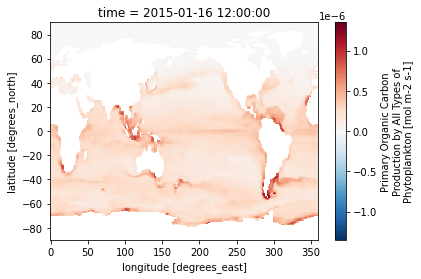

In [8]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [9]:
!cdo remapdis,r360x180 Data/Raw/intpp_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65262)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [22.10s 221MB].


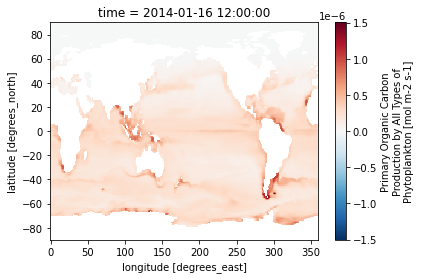

In [10]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice extent 

#### Selecting mask region

In [37]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(lat=slice(-90,0))
nc

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lon: 360, lat: 90)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -3.5 -2.5 -1.5 -0.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    siconc     (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [38]:
# Selecting the last 20 years of historical
nc = nc.drop_vars("time_bnds")
history = nc.sel(time=slice('1995-01', '2014-12'))
history

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 90)
Coordinates:
  * time     (time) object 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [39]:
# Finding yearly max ice cover 
yearly_max = history.groupby("time.year").max("time")
yearly_max

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 90, year: 20)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
  * year     (year) int64 1995 1996 1997 1998 1999 ... 2010 2011 2012 2013 2014
Data variables:
    siconc   (year, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0

In [40]:
# Calculating mean over 20 years
mean = yearly_max.mean(dim = "year")
mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 90)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    siconc   (lat, lon) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

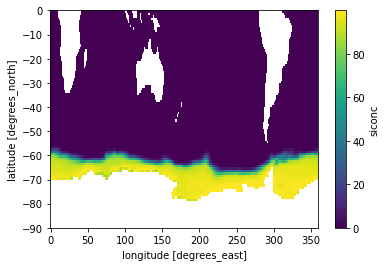

In [41]:
mean[variable].plot()

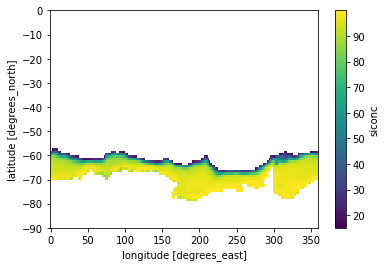

In [42]:
# Select cells with >15% ice cover
ice = mean.where(mean >= 15)
ice[variable].plot()

In [43]:
ice = ice.assign(ice = lambda x: getattr(x, variable) - getattr(x, variable) + 1)

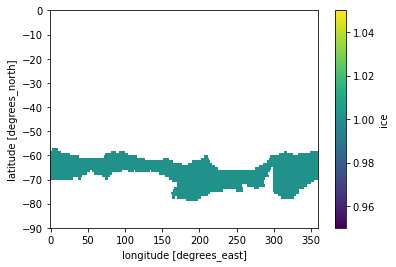

In [44]:
ice['ice'].plot()

In [45]:
ice = ice.drop_vars("siconc")
ice.to_netcdf(path = "Data/Shape/{}_{}_ice_region.nc".format(variable, model), mode = "w", format = "NETCDF4")

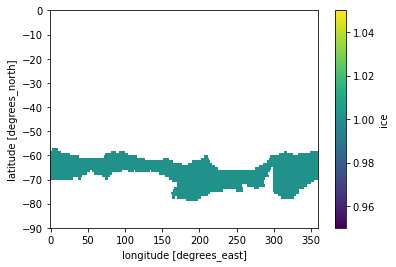

In [46]:
nc = xarray.open_dataset("Data/Shape/{}_{}_ice_region.nc".format(variable, model))
nc['ice'].plot()

#### Making mask

In [5]:
shape = gpd.read_file("Shapes/{}_ice_margin.shp".format(model), crs = "EPSG:4326")
shape

,DN,geometry
0,1,"POLYGON ((1.500 -57.000, 10.500 -57.000, 10.50..."
1,1,"POLYGON ((81.500 -58.000, 89.500 -58.000, 89.5..."
2,1,"POLYGON ((2.500 -57.000, 10.500 -57.000, 10.50..."


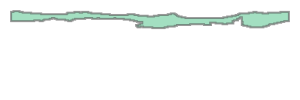

In [9]:
shape['geometry'][2]

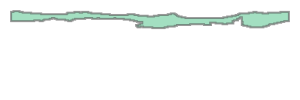

In [10]:
coord1 = shape['geometry'][2].exterior.coords
line1 = shp.LinearRing(coord1)
poly1 = shp.Polygon(line1)
poly1

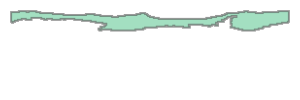

In [13]:
coord2 = shape['geometry'][1].exterior.coords
line2 = shp.LinearRing(coord2)
poly2 = shp.Polygon(line2)
poly2

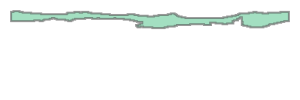

In [11]:
multi_poly = shp.MultiPolygon([poly1])
multi_poly

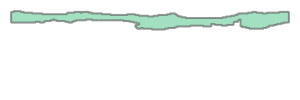

In [12]:
# Expand the region by 1 cells to include open sea
expand = shp.Polygon(multi_poly.buffer(1.0))
expand

In [13]:
ice_new = gpd.GeoSeries(expand)
ice_new

0    POLYGON ((1.500 -57.000, 1.505 -56.902, 1.519 ...
dtype: geometry

In [14]:
ice_new.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_extended_ice_margin.shp".format(model))

#### Apply mask

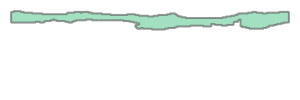

In [15]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [16]:
ice = gpd.GeoSeries(shape['geometry'][0])

In [17]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [18]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    siconc       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [19]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

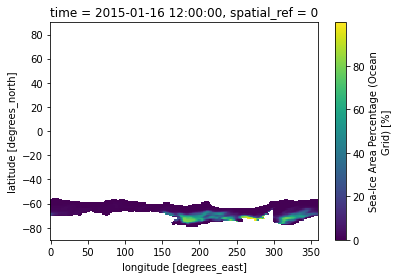

In [20]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [21]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

intpp_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc


intpp_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc


In [7]:
!cdo remapdis,r360x180 Data/Raw/intpp_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65262)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [12.30s 209MB].


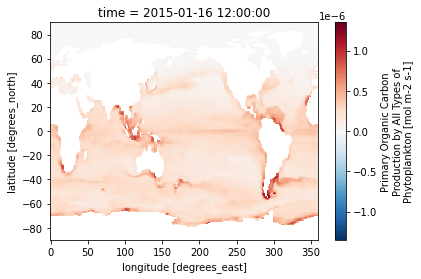

In [8]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [9]:
!cdo remapdis,r360x180 Data/Raw/intpp_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65262)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [22.10s 221MB].


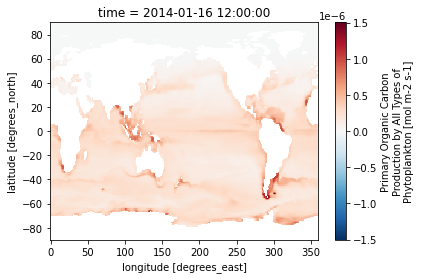

In [10]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

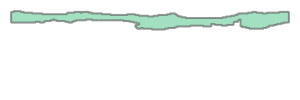

In [7]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [8]:
ice = gpd.GeoSeries(shape['geometry'][0])

##### ssp585

In [9]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [10]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    siconc       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [11]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

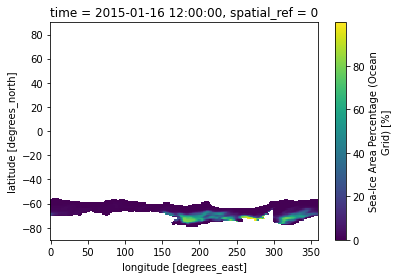

In [12]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [13]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### historical


In [14]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [15]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    siconc       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [16]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

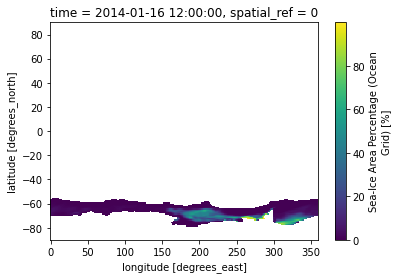

In [17]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [18]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## Cropping by export

#### Calculate percentage difference 

##### historical

In [41]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    spatial_ref  int64 ...
    siconc       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [42]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [43]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    siconc   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

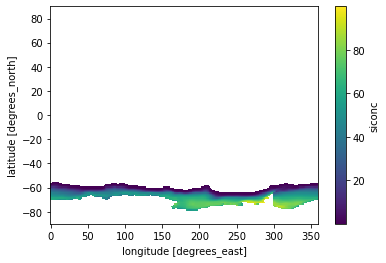

In [44]:
historical_mean[variable].plot()

In [45]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [51]:
area = nct.open_data("Data/{}_{}_historical_20yr.nc".format(variable, model))
area.cell_area()
area.to_nc("Data/cover_{}_historical_20yr.nc".format(model), overwrite=True)

In [55]:
area = xarray.open_dataset("Data/cover_{}_historical_20yr.nc".format(model))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    siconc     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
    cover      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 03 16:07:11 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [61]:
historical_cover = np.nansum(area['cover'].values)
historical_cover

777970707.851187

##### ssp585

In [62]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    spatial_ref  int64 ...
    siconc       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [63]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2081-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [64]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    siconc   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

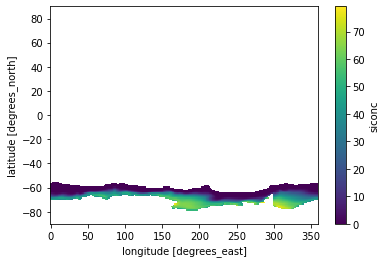

In [65]:
new_mean[variable].plot()

In [66]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

PermissionError: [Errno 13] Permission denied: b'/media/jasmine/Album/Project/Data/siconc_CMCC-ESM2_ssp585_20yr.nc'

In [67]:
area = nct.open_data("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/cover_{}_{}_20yr.nc".format(model, experiment), overwrite=True)

In [ ]:
area = xarray.open_dataset("Data/cover_{}_{}_20yr.nc".format(model, experiment))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    siconc     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
    cover      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 03 16:17:32 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [ ]:
new_cover = np.nansum(area['cover'].values)
new_cover

439531827.38707286

In [72]:
change_cover = new_cover-historical_cover
percentage_cover = (change_cover/historical_cover)*100

##### Difference calculation

In [29]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    siconc   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

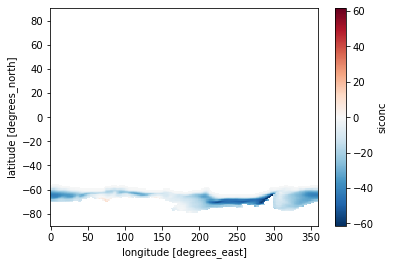

In [30]:
difference = new - historical
difference[variable].plot()
difference

In [31]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

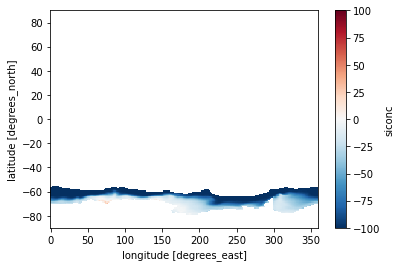

In [32]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [33]:
percentage

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    siconc   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [34]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summary values

In [70]:
mean = (percentage.mean())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}".format(mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = -60.433372497558594% -15.83715534210205
 Max inc = 56.2880859375% 14.762275695800781
 Max dec = -100.0% -61.35597610473633


In [74]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                                   mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [75]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nHistorical ice cover: {} km-2\nSSP585: {} km-2\nChange = {}% ({} km-2)".format(historical_cover, new_cover, change_cover, percentage_cover))
summary.close()

#### Apply mask

In [76]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [77]:
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 0
Data variables:
    siconc       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

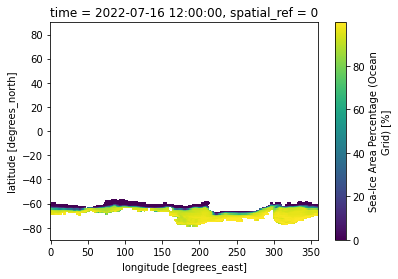

In [78]:
plotting = inc_area.sel(time = "2022-07")
plotting[variable].plot()

In [79]:
vars_list = list(inc_area.data_vars)  
for var in vars_list:  
    del inc_area[var].attrs['grid_mapping']


inc_area.to_netcdf(path = "Data/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Decreasing

In [80]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 0
Data variables:
    siconc       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

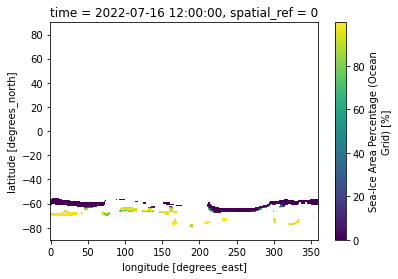

In [81]:
plotting = dec_area.sel(time = "2022-07")
plotting[variable].plot()

In [82]:
vars_list = list(dec_area.data_vars)  
for var in vars_list:  
    del dec_area[var].attrs['grid_mapping']


dec_area.to_netcdf(path = "Data/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Zonal Percentage Change Summary 

In [83]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [84]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    siconc       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

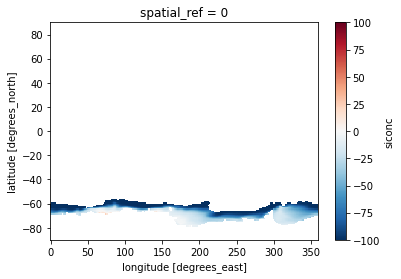

In [85]:
inc_area[variable].plot()

In [86]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    siconc       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

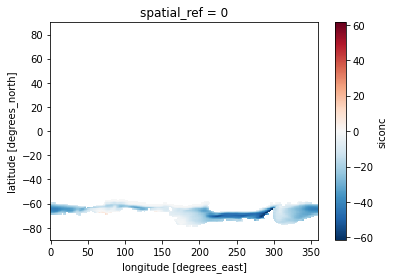

In [87]:
ab_inc_area[variable].plot()

In [88]:
inc_mean = (inc_area.mean())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = -56.58491516113281% -18.37331199645996
 Max inc = 27.489042282104492% 10.808830261230469
 Max dec = -100.0% -61.35597610473633



In [89]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

#### Zonal Mean Summary 

In [96]:
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_inc_area = new.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
new_inc_area.to_netcdf(path = "Data/{}_{}_{}_20yr_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [97]:
area = nct.open_data("Data/{}_{}_{}_20yr_inc.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/cover_{}_{}_20yr_inc.nc".format(model, experiment), overwrite=True)

In [112]:
area = xarray.open_dataset("Data/cover_{}_{}_20yr_inc.nc".format(model, experiment))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:      (lon: 360, lat: 180)
Coordinates:
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    spatial_ref  int32 ...
    siconc       (lat, lon) float32 ...
    cell_area    (lat, lon) float64 ...
    cover        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 03 16:40:08 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [113]:
new_inc_cover = np.nansum(area['cover'].values)
new_inc_cover

399709154.2603344

In [100]:
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))

historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_inc_area = historical.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
historical_inc_area.to_netcdf(path = "Data/{}_{}_historical_20yr_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [101]:
area = nct.open_data("Data/{}_{}_historical_20yr_inc.nc".format(variable, model))
area.cell_area()
area.to_nc("Data/cover_{}_historical_20yr_inc.nc".format(model), overwrite=True)

In [114]:
area = xarray.open_dataset("Data/cover_{}_historical_20yr_inc.nc".format(model, experiment))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:      (lon: 360, lat: 180)
Coordinates:
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    spatial_ref  int32 ...
    siconc       (lat, lon) float32 ...
    cell_area    (lat, lon) float64 ...
    cover        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 03 16:42:33 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [115]:
historical_inc_cover = np.nansum(area['cover'].values)
historical_inc_cover

722678641.8236501

##### Decreasing

In [90]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    siconc       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

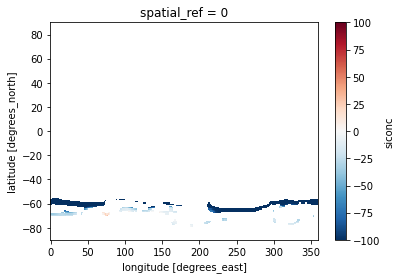

In [91]:
dec_area[variable].plot()

In [92]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    siconc       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

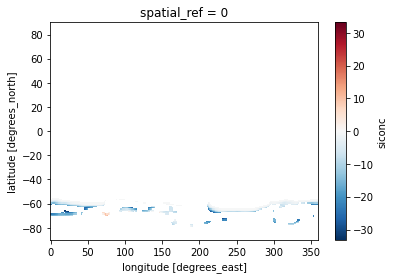

In [93]:
ab_dec_area[variable].plot()

In [94]:
dec_mean = (dec_area.mean())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -73.22067260742188% -6.763511657714844
 Max inc = 56.2880859375% 14.762275695800781
 Max dec = -100.0% -33.17012023925781



In [95]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nDecreasing zone:\nMean change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

In [104]:
new_dec_area = new.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
new_dec_area.to_netcdf(path = "Data/{}_{}_{}_20yr_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [105]:
area = nct.open_data("Data/{}_{}_{}_20yr_dec.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/cover_{}_{}_20yr_dec.nc".format(model, experiment), overwrite=True)

In [116]:
area = xarray.open_dataset("Data/cover_{}_{}_20yr_dec.nc".format(model, experiment))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:      (lon: 360, lat: 180)
Coordinates:
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    spatial_ref  int32 ...
    siconc       (lat, lon) float32 ...
    cell_area    (lat, lon) float64 ...
    cover        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 03 16:43:48 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [117]:
new_dec_cover = np.nansum(area['cover'].values)
new_dec_cover

85012382.11290659

In [108]:
historical_dec_area = historical.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
historical_dec_area.to_netcdf(path = "Data/{}_{}_historical_20yr_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [109]:
area = nct.open_data("Data/{}_{}_historical_20yr_dec.nc".format(variable, model))
area.cell_area()
area.to_nc("Data/cover_{}_historical_20yr_dec.nc".format(model), overwrite=True)

In [118]:
area = xarray.open_dataset("Data/cover_{}_historical_20yr_dec.nc".format(model, experiment))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:      (lon: 360, lat: 180)
Coordinates:
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    spatial_ref  int32 ...
    siconc       (lat, lon) float32 ...
    cell_area    (lat, lon) float64 ...
    cover        (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 03 16:44:38 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [119]:
historical_dec_cover = np.nansum(area['cover'].values)
historical_dec_cover

130802083.81962009

In [120]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nHistorical cover = {}lm-2\nSSP585 cover = {} km-2\n\n\nDecreasing zone:\nHistorical cover = {} km-2\nSSp585 cover = {} km-2".format(historical_inc_cover,
new_inc_cover, historical_dec_cover, new_dec_cover))
summary.close()

## Absolute map

##### historical

In [121]:
# Annual mean at 2014
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical = historical.drop_vars("spatial_ref")
historical

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [122]:
historical_end = historical.sel(time = "2014")
historical_end

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2014-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:43 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/01c8d755-c140-4d70-abdc-ee1c599f9db0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, year: 1)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * year     (year) int64 2014
Data variables:
    siconc   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

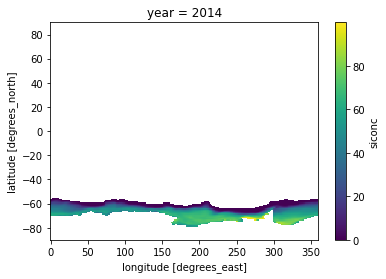

In [123]:
historical_mean = historical_end.groupby("time.year").mean("time")
historical_mean[variable].plot()
historical_mean

In [124]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_2014.nc".format(variable, model), mode = "w", format = "NETCDF4")

##### ssp585

In [125]:
# Annual mean at 2100
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new = new.drop_vars("spatial_ref")
new

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [126]:
new_end = new.sel(time = "2100")
new_end

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2100-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, year: 1)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * year     (year) int64 2100
Data variables:
    siconc   (year, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

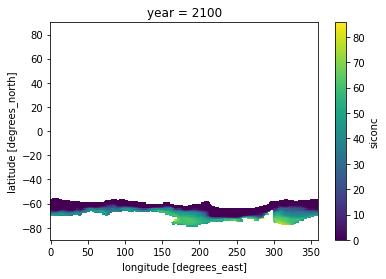

In [127]:
new_mean = new_end.groupby("time.year").mean("time")
new_mean[variable].plot()
new_mean

In [128]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_2100.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Summary values

In [129]:
print("Mean at 2014 is: {}".format(historical_mean.mean()[variable].values))
print("Mean at 2100 is: {}".format(new_mean.mean()[variable].values))

Mean at 2014 is: 38.10828399658203
Mean at 2100 is: 21.914905548095703


##### Mapping

In [130]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

In [131]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_2014.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_2100.nc".format(variable, model, experiment))

In [132]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

99.99883 0.0


/tmp/ipykernel_16807/3715887452.py:5: RuntimeWarning: Mean of empty slice


In [133]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

85.75181 0.0


/tmp/ipykernel_16807/1500621824.py:5: RuntimeWarning: Mean of empty slice


In [134]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

99.99883 0.0


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

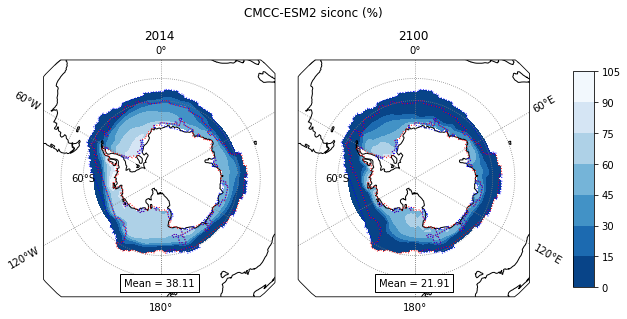

In [139]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'Blues_r',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

ax1.add_geometries(inc['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'red',
                  linestyle = ':')

ax1.add_geometries(dec['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'blue',
                  linestyle = ':')


mean2014 = AnchoredText("Mean = {:.2f}".format(historical_mean.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'Blues_r',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

ax2.add_geometries(inc['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'red',
                  linestyle = ':')

ax2.add_geometries(dec['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'blue',
                  linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new_mean.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/CMCC-ESM2/{}_{}_2014vs2100.png".format(variable, model))

plt.show()

## Percentage Change map

In [140]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    siconc   (lat, lon) float32 ...

In [141]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)
label = abs(max([var_min, var_max], key = abs))
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

56.288086 -100.0


In [142]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

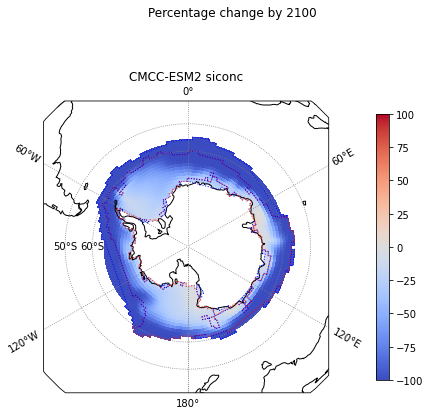

In [143]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vcenter = 0.)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

ax1.add_geometries(inc['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'red',
                  linestyle = ':')

ax1.add_geometries(dec['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'blue',
                  linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/CMCC-ESM2/{}_{}_percentage_change.png".format(variable, model))

plt.show()

## Mean regression 

### Total


In [144]:
area = nct.open_data("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/{}_{}_{}_cropped_area.nc".format(variable, model, experiment), overwrite=True)

In [6]:
area = xarray.open_dataset("Data/{}_{}_{}_cropped_area.nc".format(variable, model, experiment))
area = area.assign(cover=lambda x: x.siconc * x.cell_area / 1000000)
area

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    spatial_ref  int32 ...
    siconc       (time, lat, lon) float32 ...
    cell_area    (lat, lon) float64 ...
    cover        (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 03 17:08:50 2022: cdo -L -z zip_9 copy /t...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [7]:
# Change in annual mean value 
area = area.drop_vars("spatial_ref")
area = area.drop_vars("siconc")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    cover    (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 03 17:08:50 2022: cdo -L -z zip_9 copy /t...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [8]:
# Total sea ice area
spatial_mean = nc.groupby("time").sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    cover    (time) float64 2.034e+08 4.907e+07 7e+07 ... 5.913e+08 2.271e+08

In [9]:
year_mean = spatial_mean.groupby("time.year").mean("time")
year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    cover    (year) float64 7.913e+08 7.727e+08 7.63e+08 ... 4.194e+08 4.108e+08

In [12]:
var_mean = year_mean['cover'].values

In [13]:
time = year_mean['year'].values
time

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [14]:
yearly_summer = []
yearly_winter = []

In [15]:
for i in time:
    year = spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")['cover'].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")['cover'].values
    winter = winter.tolist()
    
    yearly_summer.append(summer)
    yearly_winter.append(winter)
    

In [16]:
data = {'Year': time,
        'Annual': var_mean,
        'Summer': yearly_summer,
        'Winter': yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,7.913360e+08,2.977302e+08,1.203736e+09,CMCC-ESM2
1,2016,7.727144e+08,2.990741e+08,1.179885e+09,CMCC-ESM2
2,2017,7.629661e+08,2.915107e+08,1.132227e+09,CMCC-ESM2
3,2018,7.732891e+08,2.906725e+08,1.158320e+09,CMCC-ESM2
4,2019,6.975536e+08,2.685172e+08,1.033966e+09,CMCC-ESM2
...,...,...,...,...,...
81,2096,4.186633e+08,9.445626e+07,6.561848e+08,CMCC-ESM2
82,2097,4.325983e+08,1.073404e+08,6.805117e+08,CMCC-ESM2
83,2098,4.275448e+08,9.578895e+07,6.869489e+08,CMCC-ESM2
84,2099,4.194385e+08,8.860355e+07,6.731008e+08,CMCC-ESM2


In [17]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)

#### Plotting


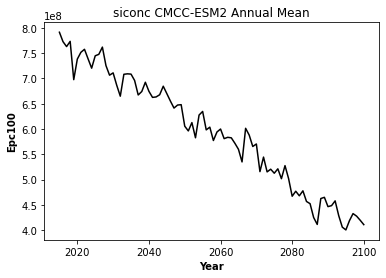

In [44]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Annual Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_annual_mean.png".format(variable, model, experiment))

plt.show()

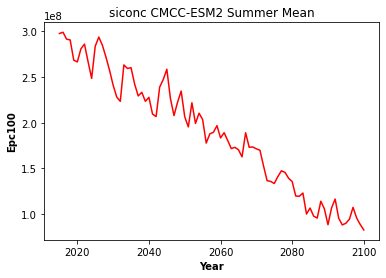

In [45]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Summer Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_summer_mean.png".format(variable, model, experiment))

plt.show()

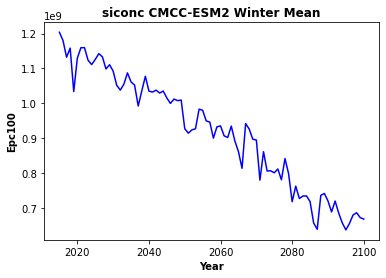

In [46]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
ax.plot(time, yearly_winter, 'b')

plt.title("{} {} Winter Mean".format(variable, model),fontweight="bold")

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_winter_mean.png".format(variable, model, experiment))

plt.show()

In [38]:
# annual_inflection = 2034.4

# annual_point = np.where(time == int(annual_inflection))[0].tolist()
# annual_label = int(annual_inflection)
# annual_position = (annual_label, var_mean[annual_point][0])


# summer_inflection = 2052.9

# summer_point = np.where(time == int(summer_inflection))[0].tolist()
# summer_label = int(summer_inflection)
# summer_position = (summer_label, yearly_summer[summer_point[0]])


winter_inflection = 2062.1

winter_point = np.where(time == int(winter_inflection))[0].tolist()
winter_label = int(winter_inflection)
winter_position = (winter_label, yearly_winter[winter_point[0]])

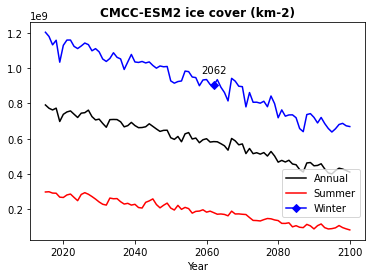

In [43]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, '-k',  label = "Annual")
ax.plot(time, yearly_summer, '-r', label = "Summer")
ax.plot(time, yearly_winter, '-bD', markevery=winter_point, label = "Winter")

#plt.annotate(annual_label, annual_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(summer_label, summer_position, textcoords="offset points",xytext=(0,12), ha='center') 
plt.annotate(winter_label, winter_position, textcoords="offset points",xytext=(0,12), ha='center') 

plt.title("{} ice cover (km-2)".format(model), fontweight="bold")

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
#ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

#plt.ylabel("Epc100")
plt.xlabel("Year")

# bbox_to_anchor specify the position (x,y) of box in graph from the corner of the box specified by loc
plt.legend(loc="lower right", bbox_to_anchor=(1, 0.08))

plt.savefig("output/CMCC-ESM2/{}_{}_{}_mean_projection_whole.png".format(variable, model, experiment))

plt.show()

### Zonal

##### Increasing zone

In [18]:
inc = xarray.open_dataset("Data/{}_{}_{}_inc.nc".format(variable, model, experiment))
inc = inc.drop_vars("spatial_ref")
inc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [19]:
inc_spatial_mean = inc.groupby("time").mean(["lat", "lon"])
inc_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time) float32 13.33 3.317 5.119 22.82 ... 51.09 48.33 35.24 14.38

In [20]:
inc_year_mean = inc_spatial_mean.groupby("time.year").mean("time")
inc_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    siconc   (year) float32 44.73 44.17 43.52 43.54 ... 25.47 25.16 24.81 24.1

In [21]:
inc_mean = inc_year_mean[variable].values

In [22]:
time = inc_year_mean['year'].values

In [23]:
inc_yearly_summer = []
inc_yearly_winter = []

In [24]:
for i in time:
    year = inc_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    inc_yearly_summer.append(summer)
    inc_yearly_winter.append(winter)
    

In [25]:
data = {'Year': time,
        'Annual': inc_mean,
        'Summer': inc_yearly_summer,
        'Winter': inc_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,44.727077,18.368204,67.233070,CMCC-ESM2
1,2016,44.165051,18.623779,66.002106,CMCC-ESM2
2,2017,43.515629,18.145906,63.630569,CMCC-ESM2
3,2018,43.540272,17.783604,64.633759,CMCC-ESM2
4,2019,39.764053,16.565310,58.219391,CMCC-ESM2
...,...,...,...,...,...
81,2096,24.449560,6.147040,37.802814,CMCC-ESM2
82,2097,25.473783,7.003279,39.359516,CMCC-ESM2
83,2098,25.157654,6.219965,39.898403,CMCC-ESM2
84,2099,24.812067,5.716793,39.291264,CMCC-ESM2


In [26]:
df.to_csv("csv/{}_{}_inc.csv".format(model, variable), index = False, header=True)

##### Decreasing zone

In [27]:
dec = xarray.open_dataset("Data/{}_{}_{}_dec.nc".format(variable, model, experiment))
dec = dec.drop_vars("spatial_ref")
dec

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:41:15 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/613875b4-41cd-4696-983c-421ec448b459
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [28]:
dec_spatial_mean = dec.groupby("time").mean(["lat", "lon"])
dec_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    siconc   (time) float32 2.135 0.6999 1.658 10.24 ... 29.9 26.86 16.74 5.02

In [29]:
dec_year_mean = dec_spatial_mean.groupby("time.year").mean("time")
dec_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    siconc   (year) float32 21.73 20.46 19.97 22.15 ... 14.48 14.43 14.19 14.33

In [30]:
dec_mean = dec_year_mean[variable].values

In [31]:
dec_yearly_summer = []
dec_yearly_winter = []

In [32]:
for i in time:
    year = dec_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    dec_yearly_summer.append(summer)
    dec_yearly_winter.append(winter)
    

In [33]:
time = dec_year_mean['year'].values

In [34]:
data = {'Year': time,
        'Annual': dec_mean,
        'Summer': dec_yearly_summer,
        'Winter': dec_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,21.725410,5.350441,32.833164,CMCC-ESM2
1,2016,20.457159,4.161459,32.083050,CMCC-ESM2
2,2017,19.969536,4.496087,31.121460,CMCC-ESM2
3,2018,22.152283,6.288939,32.326099,CMCC-ESM2
4,2019,19.950241,5.614319,30.230967,CMCC-ESM2
...,...,...,...,...,...
81,2096,14.707753,1.779249,26.144072,CMCC-ESM2
82,2097,14.482757,1.882271,25.373384,CMCC-ESM2
83,2098,14.429414,1.506853,26.281794,CMCC-ESM2
84,2099,14.186067,1.806901,25.529333,CMCC-ESM2


In [35]:
df.to_csv("csv/{}_{}_dec.csv".format(model, variable), index = False, header=True)

##### Plotting

In [47]:
inc_inflection = 2062.1

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_mean[inc_point][0])


dec_inflection = 2080.6

dec_point = np.where(time == int(dec_inflection))[0].tolist()
dec_label = int(dec_inflection)
dec_position = (dec_label, dec_mean[dec_point][0])

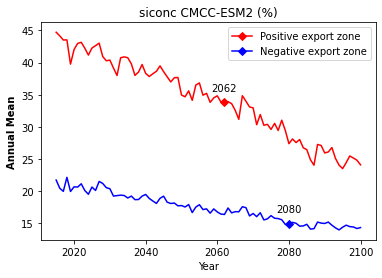

In [48]:
fig, ax = plt.subplots()


ax.plot(time, inc_mean, '-rD', markevery = inc_point, label = "Positive export zone")
ax.plot(time, dec_mean, '-bD', markevery = dec_point, label = "Negative export zone")


plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/CMCC-ESM2/{}_{}_{}_annual_projection_by_zone.png".format(variable, model, experiment))

plt.show()

In [216]:
# inc_inflection = 2052.9

# inc_point = np.where(time == int(inc_inflection))[0].tolist()
# inc_label = int(inc_inflection)
# inc_position = (inc_label, inc_yearly_summer[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_summer[dec_point[0]])

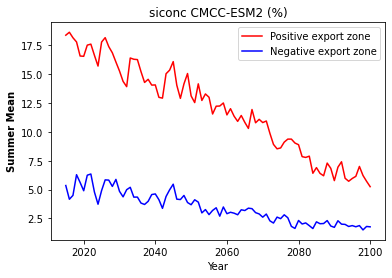

In [49]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_summer, '-r', label = "Positive export zone")
ax.plot(time, dec_yearly_summer, '-b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/CMCC-ESM2/{}_{}_{}_summer_projection_by_zone.png".format(variable, model, experiment))

plt.show()

In [50]:
inc_inflection = 2062.1

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_yearly_winter[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_winter[dec_point[0]])

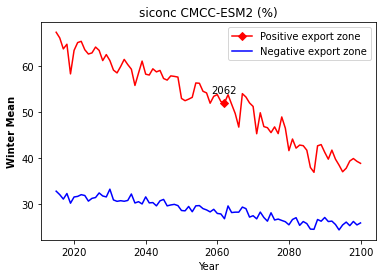

In [53]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_winter, '-rD', markevery = inc_point, label = "Positive export zone")
ax.plot(time, dec_yearly_winter, '-b', label = "Negative export zone")

plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/CMCC-ESM2/{}_{}_{}_winter_projection_by_zone.png".format(variable, model, experiment))

plt.show()

## Correlation with epc100

### 20 year change correlation

#### Percentage

In [6]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage.nc".format(model, experiment))

In [7]:
cor_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.21923655)
Coordinates:
    depth    float64 100.0

In [8]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nPercentage correlation with epc100: {}".format(cor_per.values))
summary.close()

#### Absolute

In [9]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
exp_inc_abs = xarray.open_dataarray("Data/epc100_{}_{}_absolute.nc".format(model, experiment))

In [11]:
cor_abs = xarray.corr(current_inc_abs, exp_inc_abs, dim = ["lat", "lon"])
cor_abs

<xarray.DataArray ()>
array(-0.43314231)
Coordinates:
    depth    float64 100.0

In [12]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nAbsolute correlation with epc100: {}".format(cor_abs.values))
summary.close()

### Spatial correlation 

#### Increasing zone


In [75]:
current_inc = xarray.open_dataarray("Data/{}_{}_{}_inc.nc".format(variable, model, experiment),decode_coords="all")
current_inc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'siconc' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 ...
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Sea-Ice Area Percentage (Ocean Grid)
    units:          %
    comment:        Percentage of grid cell covered by sea ice
    original_name:  aice
    cell_methods:   area: mean where sea time: mean
    history:        2021-01-19T23:30:29Z altered by CMOR: Treated scalar dime...

In [76]:
epc = xarray.open_dataarray("Data/epc100_{}_{}_inc.nc".format(model, experiment), decode_coords="all")
epc

<xarray.DataArray 'epc100' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    depth        float64 ...
    spatial_ref  int64 ...
Attributes:
    standard_name:  sinking_mole_flux_of_particulate_organic_matter_expressed...
    long_name:      Downward Flux of Particulate Organic Carbon
    units:          mol m-2 s-1
    comment:        The phrase 'expressed_as' is used in the construction A_e...
    original_name:  expc (levid 19)
    cell_methods:   area: mean where sea time: mean
    history:        2021-01-20T13:14:42Z altered by CMOR: Treated scalar dime...

In [77]:
cor_inc = xarray.corr(current_inc, epc, dim = ["lat", "lon"])
cor_inc = cor_inc.groupby("time.year").mean("time")
cor_inc

<xarray.DataArray (year: 86)>
array([-0.21957783, -0.22806246, -0.25195823, -0.1741075 , -0.24955956,
       -0.237352  , -0.24575747, -0.23028425, -0.21450576, -0.23752404,
       -0.2220682 , -0.21489566, -0.14326039, -0.1924569 , -0.15269798,
       -0.22842997, -0.15715389, -0.16084595, -0.21530499, -0.22918546,
       -0.20371327, -0.18010709, -0.11704359, -0.15094801, -0.19192863,
       -0.13365461, -0.18499569, -0.21429479, -0.2355113 , -0.21227916,
       -0.19422251, -0.21687579, -0.17040337, -0.1772027 , -0.15381482,
       -0.17886877, -0.13038183, -0.14639456, -0.20810232, -0.19478824,
       -0.22488552, -0.1504857 , -0.16212423, -0.22244756, -0.18985347,
       -0.18286274, -0.18245787, -0.15563221, -0.1844008 , -0.15779219,
       -0.12804404, -0.11258901, -0.13309468, -0.1822876 , -0.14874705,
       -0.17107164, -0.20502245, -0.11536391, -0.11167761, -0.10636372,
       -0.05564466, -0.10156928, -0.14136942, -0.15654271, -0.0599442 ,
       -0.11462756, -0.10967981, -0.03535727, -0.04288857, -0.09788911,
       -0.0851624 , -0.09476653, -0.03070342, -0.10232598, -0.11703783,
       -0.08483609, -0.07999037, -0.09373285, -0.12607559, -0.09458999,
       -0.01830892, -0.03883044, -0.11984503, -0.11757376, -0.0661742 ,
       -0.04934191])
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [78]:
time = cor_inc["year"].values

In [79]:
current_inc_season = current_inc.resample(time='QS-DEC').mean(dim="time")
current_inc_season['time']

<xarray.DataArray 'time' (time: 345)>
array([cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 6, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2100, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time         (time) object 2014-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0

In [80]:
current_inc_summer = current_inc_season.sel(time=(current_inc_season.time.dt.month == 12))
current_inc_summer = current_inc_summer.sel(time = slice("2015","2100"))

In [81]:
current_inc_winter = current_inc_season.sel(time=(current_inc_season.time.dt.month == 6))

In [82]:
epc_inc_season = epc.resample(time='QS-DEC').mean(dim="time")

In [83]:
epc_inc_summer = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 12))
epc_inc_summer = epc_inc_summer.sel(time = slice("2015","2100"))
epc_inc_winter = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 6))

In [84]:
cor_inc_summer = xarray.corr(current_inc_summer, epc_inc_summer, dim = ["lat", "lon"])
cor_inc_summer

<xarray.DataArray (time: 86)>
array([-0.74610944, -0.80134428, -0.75145772, -0.76156567, -0.76621991,
       -0.75739889, -0.75193275, -0.7658229 , -0.76417152, -0.73253179,
       -0.7036136 , -0.74139843, -0.75183859, -0.69232167, -0.67059478,
       -0.67288977, -0.75983672, -0.7250504 , -0.803908  , -0.70585531,
       -0.77089442, -0.68958766, -0.72773656, -0.75420497, -0.71316644,
       -0.71628304, -0.72169687, -0.71838124, -0.72546263, -0.74069936,
       -0.74908179, -0.69552482, -0.67229761, -0.7157319 , -0.73456521,
       -0.69534836, -0.7061816 , -0.73160861, -0.74422844, -0.73995888,
       -0.78729038, -0.75930507, -0.74783041, -0.6975086 , -0.75349407,
       -0.76754672, -0.71244609, -0.67440028, -0.68766518, -0.67751357,
       -0.68749679, -0.65691033, -0.75819202, -0.70357987, -0.75426711,
       -0.68965396, -0.73017138, -0.73111169, -0.73018571, -0.71572525,
       -0.71127222, -0.68722005, -0.76640568, -0.71755345, -0.71683949,
       -0.73394522, -0.64178293, -0.65742799, -0.70126368, -0.66385183,
       -0.70130019, -0.62709472, -0.67400931, -0.67815347, -0.70999979,
       -0.69175969, -0.69803721, -0.69707578, -0.71968535, -0.70325349,
       -0.66838113, -0.67249389, -0.70420406, -0.7093674 , -0.66119226,
       -0.62060497])
Coordinates:
  * time         (time) object 2015-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0
    depth        float64 100.0

In [85]:
cor_inc_winter = xarray.corr(current_inc_winter, epc_inc_winter, dim = ["lat", "lon"])
cor_inc_winter

<xarray.DataArray (time: 86)>
array([0.04684389, 0.00162268, 0.06861337, 0.1723529 , 0.11304477,
       0.06840668, 0.0838507 , 0.05250872, 0.13174849, 0.08343094,
       0.08121239, 0.09902063, 0.26837612, 0.13321878, 0.116617  ,
       0.04731473, 0.17332871, 0.18714817, 0.14274171, 0.07738641,
       0.14845057, 0.18822536, 0.27359197, 0.1646801 , 0.03680814,
       0.20850542, 0.12354975, 0.04648239, 0.08059201, 0.12508932,
       0.15161094, 0.15250358, 0.10566822, 0.14728742, 0.25830281,
       0.17518304, 0.2500043 , 0.26694576, 0.09639282, 0.14018109,
       0.12574456, 0.2007673 , 0.20588876, 0.075085  , 0.09565756,
       0.12781543, 0.17232764, 0.16773827, 0.05839887, 0.17042358,
       0.2355263 , 0.28237398, 0.22022413, 0.13184322, 0.16176303,
       0.19752461, 0.14858899, 0.20823576, 0.25884116, 0.2485943 ,
       0.39829452, 0.29064913, 0.22840138, 0.16350594, 0.38171574,
       0.29614204, 0.2931123 , 0.42178627, 0.3859876 , 0.26733896,
       0.29854732, 0.26911634, 0.38026252, 0.24805778, 0.23877157,
       0.34799928, 0.34019345, 0.29870153, 0.31114595, 0.33109919,
       0.49001737, 0.3825453 , 0.26051149, 0.26176473, 0.32149524,
       0.32534905])
Coordinates:
  * time         (time) object 2015-06-01 00:00:00 ... 2100-06-01 00:00:00
    spatial_ref  int64 0
    depth        float64 100.0

In [24]:
data = {'Year': time,
        'Annual': cor_inc,
        'Summer': cor_inc_summer,
        'Winter': cor_inc_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.219578,-0.746109,0.046844,CMCC-ESM2
1,2016,-0.228062,-0.801344,0.001623,CMCC-ESM2
2,2017,-0.251958,-0.751458,0.068613,CMCC-ESM2
3,2018,-0.174107,-0.761566,0.172353,CMCC-ESM2
4,2019,-0.249560,-0.766220,0.113045,CMCC-ESM2
...,...,...,...,...,...
81,2096,-0.038830,-0.672494,0.382545,CMCC-ESM2
82,2097,-0.119845,-0.704204,0.260511,CMCC-ESM2
83,2098,-0.117574,-0.709367,0.261765,CMCC-ESM2
84,2099,-0.066174,-0.661192,0.321495,CMCC-ESM2


In [25]:
df.to_csv("csv/{}_{}_epc100_correlation_inc.csv".format(model, variable), index = False, header=True)

In [26]:
inc_mean = np.nanmean(cor_inc.values)
inc_mean_summer = np.nanmean(cor_inc_summer.values)
inc_mean_winter = np.nanmean(cor_inc_winter.values)

inc_max = np.nanmax(cor_inc.values)
inc_max_summer = np.nanmax(cor_inc_summer.values)
inc_max_winter = np.nanmax(cor_inc_winter.values)

inc_min = np.nanmin(cor_inc.values)
inc_min_summer = np.nanmin(cor_inc_summer.values)
inc_min_winter = np.nanmin(cor_inc_winter.values)

In [27]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with epc100 in increasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(inc_mean, inc_max, inc_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(inc_mean_summer, inc_max_summer, inc_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(inc_mean_winter, inc_max_winter, inc_min_winter))
summary.close()

#### Plotting

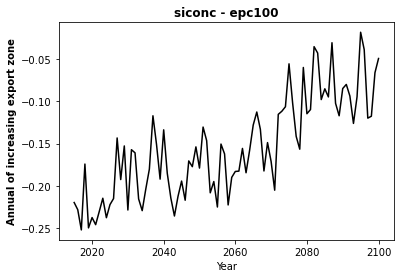

In [86]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_annual_inc_correlation.png".format(model, variable, model))

plt.show()

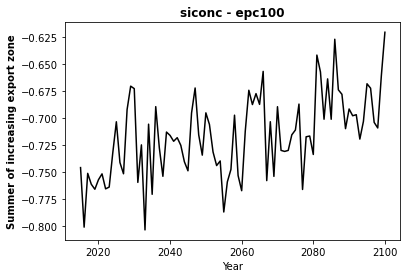

In [87]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_summer, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_summer_inc_correlation.png".format(model, variable, model))

plt.show()

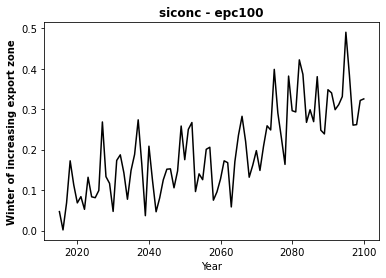

In [88]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_winter, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_winter_inc_correlation.png".format(model, variable, model))

plt.show()

#### Decreasing zone


In [89]:
current_dec = xarray.open_dataarray("Data/{}_{}_{}_dec.nc".format(variable, model, experiment),decode_coords="all")
current_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'siconc' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 ...
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Sea-Ice Area Percentage (Ocean Grid)
    units:          %
    comment:        Percentage of grid cell covered by sea ice
    original_name:  aice
    cell_methods:   area: mean where sea time: mean
    history:        2021-01-19T23:30:29Z altered by CMOR: Treated scalar dime...

In [90]:
epc_dec = xarray.open_dataarray("Data/epc100_{}_{}_dec.nc".format(model, experiment), decode_coords="all")
epc_dec

<xarray.DataArray 'epc100' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    depth        float64 ...
    spatial_ref  int64 ...
Attributes:
    standard_name:  sinking_mole_flux_of_particulate_organic_matter_expressed...
    long_name:      Downward Flux of Particulate Organic Carbon
    units:          mol m-2 s-1
    comment:        The phrase 'expressed_as' is used in the construction A_e...
    original_name:  expc (levid 19)
    cell_methods:   area: mean where sea time: mean
    history:        2021-01-20T13:14:42Z altered by CMOR: Treated scalar dime...

In [91]:
cor_dec = xarray.corr(current_dec, epc_dec, dim = ["lat", "lon"])
cor_dec = cor_dec.groupby("time.year").mean("time")
cor_dec

<xarray.DataArray (year: 86)>
array([ 0.0833478 ,  0.13599762,  0.09268145,  0.11384393,  0.09524662,
        0.11230617,  0.02651787,  0.07700203,  0.16111234,  0.11677553,
        0.0852593 ,  0.08842806,  0.08490404,  0.09389927,  0.11390317,
        0.01946789,  0.12135538,  0.100542  ,  0.0485114 ,  0.06984104,
        0.05802268,  0.10006748,  0.12610761,  0.12690971,  0.16658527,
        0.11215936,  0.11828066,  0.10446277,  0.07821741,  0.06811949,
        0.07866062,  0.12602345,  0.08146364,  0.06316629,  0.12782298,
        0.14748052,  0.08538597,  0.10838423, -0.00149533,  0.00656119,
        0.04746758,  0.07744497,  0.0996906 ,  0.09477926,  0.06441064,
        0.05098295,  0.08373919,  0.08207707,  0.13409064,  0.11087623,
        0.07009487,  0.08443696,  0.0886232 ,  0.07439639,  0.08630671,
        0.05947724,  0.08962117,  0.16530043,  0.10063636,  0.08062053,
        0.11338867,  0.12824651,  0.07860147,  0.07479033,  0.12944008,
        0.12713213,  0.08157846,  0.08017299,  0.09431541,  0.12459519,
        0.09470673,  0.10643666,  0.07814827,  0.08764858,  0.11272624,
        0.17267937,  0.12574758,  0.09229832,  0.05570667,  0.0374191 ,
        0.11580719,  0.17533443,  0.09139061,  0.06952766,  0.10533593,
        0.13922266])
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [92]:
time = cor_dec["year"].values

In [93]:
current_dec_season = current_dec.resample(time='QS-DEC').mean(dim="time")
current_dec_season['time']

<xarray.DataArray 'time' (time: 345)>
array([cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 6, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2100, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time         (time) object 2014-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0

In [94]:
current_dec_summer = current_dec_season.sel(time=(current_dec_season.time.dt.month == 12))
current_dec_summer = current_dec_summer.sel(time = slice("2015","2100"))

In [95]:
current_dec_winter = current_dec_season.sel(time=(current_dec_season.time.dt.month == 6))

In [96]:
epc_dec_season = epc_dec.resample(time='QS-DEC').mean(dim="time")

In [97]:
epc_dec_summer = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 12))
epc_dec_summer = epc_dec_summer.sel(time = slice("2015","2100"))
epc_dec_winter = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 6))

In [98]:
cor_dec_summer = xarray.corr(current_dec_summer, epc_dec_summer, dim = ["lat", "lon"])
cor_dec_summer

<xarray.DataArray (time: 86)>
array([-0.5149296 , -0.46306299, -0.44671069, -0.49898574, -0.4756176 ,
       -0.58521256, -0.58962961, -0.49508378, -0.50775946, -0.50744923,
       -0.44381214, -0.52699625, -0.51757991, -0.38242327, -0.50643633,
       -0.43301923, -0.45807811, -0.55723826, -0.56876449, -0.41023584,
       -0.48693089, -0.37153314, -0.41797901, -0.44109   , -0.54398509,
       -0.44485098, -0.49850045, -0.41325883, -0.43925763, -0.47204834,
       -0.46726223, -0.45813008, -0.4764744 , -0.47564651, -0.36892118,
       -0.36839338, -0.57186926, -0.48642649, -0.51885004, -0.50152186,
       -0.47357189, -0.49552762, -0.48085555, -0.4884788 , -0.48837645,
       -0.46047686, -0.39715671, -0.3811088 , -0.43270556, -0.44449647,
       -0.46463989, -0.41951999, -0.46439365, -0.40429294, -0.49757753,
       -0.38811992, -0.3935142 , -0.36821827, -0.49194513, -0.4933677 ,
       -0.48099148, -0.44175293, -0.47983134, -0.42759907, -0.30798839,
       -0.49773027, -0.29520662, -0.35470195, -0.36725364, -0.32998965,
       -0.38748411, -0.36087414, -0.45323086, -0.46370804, -0.39208441,
       -0.40551363, -0.35226199, -0.40843303, -0.4192356 , -0.45111956,
       -0.36800538, -0.42047336, -0.40504972, -0.40743028, -0.35616935,
       -0.53607667])
Coordinates:
  * time         (time) object 2015-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0
    depth        float64 100.0

In [99]:
cor_dec_winter = xarray.corr(current_dec_winter, epc_dec_winter, dim = ["lat", "lon"])
cor_dec_winter

<xarray.DataArray (time: 86)>
array([0.58581813, 0.61476493, 0.63339689, 0.6354082 , 0.65056578,
       0.64358998, 0.56532833, 0.60343339, 0.74351969, 0.66491314,
       0.60893841, 0.57415974, 0.65692462, 0.59194356, 0.61200442,
       0.53704068, 0.62316028, 0.62196921, 0.62349789, 0.55460973,
       0.57628438, 0.6015736 , 0.63665303, 0.66803555, 0.68770478,
       0.66266359, 0.62232075, 0.55083908, 0.59549077, 0.58852216,
       0.58672232, 0.67446026, 0.56069745, 0.58414912, 0.65680866,
       0.63029745, 0.63096915, 0.68671326, 0.46796137, 0.4587199 ,
       0.55497428, 0.61401597, 0.6332569 , 0.64416853, 0.59529   ,
       0.57071909, 0.62276865, 0.55920048, 0.57685109, 0.62377384,
       0.61895747, 0.59286012, 0.59037408, 0.54720649, 0.5793117 ,
       0.55142829, 0.63419823, 0.65225961, 0.57506807, 0.61370753,
       0.69807874, 0.63992754, 0.54194032, 0.53429293, 0.64675904,
       0.70448636, 0.62065621, 0.57111896, 0.55244705, 0.60755677,
       0.57082468, 0.62988057, 0.5709302 , 0.54648202, 0.6086082 ,
       0.72321794, 0.68543541, 0.61489488, 0.57342363, 0.49137236,
       0.64200028, 0.73427305, 0.60291003, 0.57132616, 0.63953529,
       0.66611549])
Coordinates:
  * time         (time) object 2015-06-01 00:00:00 ... 2100-06-01 00:00:00
    spatial_ref  int64 0
    depth        float64 100.0

In [42]:
data = {'Year': time,
        'Annual': cor_dec,
        'Summer': cor_dec_summer,
        'Winter': cor_dec_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,0.083348,-0.514930,0.585818,CMCC-ESM2
1,2016,0.135998,-0.463063,0.614765,CMCC-ESM2
2,2017,0.092681,-0.446711,0.633397,CMCC-ESM2
3,2018,0.113844,-0.498986,0.635408,CMCC-ESM2
4,2019,0.095247,-0.475618,0.650566,CMCC-ESM2
...,...,...,...,...,...
81,2096,0.175334,-0.420473,0.734273,CMCC-ESM2
82,2097,0.091391,-0.405050,0.602910,CMCC-ESM2
83,2098,0.069528,-0.407430,0.571326,CMCC-ESM2
84,2099,0.105336,-0.356169,0.639535,CMCC-ESM2


In [43]:
df.to_csv("csv/{}_{}_epc100_correlation_dec.csv".format(model, variable), index = False, header=True)

In [44]:
dec_mean = np.nanmean(cor_dec.values)
dec_mean_summer = np.nanmean(cor_dec_summer.values)
dec_mean_winter = np.nanmean(cor_dec_winter.values)

dec_max = np.nanmax(cor_dec.values)
dec_max_summer = np.nanmax(cor_dec_summer.values)
dec_max_winter = np.nanmax(cor_dec_winter.values)

dec_min = np.nanmin(cor_dec.values)
dec_min_summer = np.nanmin(cor_dec_summer.values)
dec_min_winter = np.nanmin(cor_dec_winter.values)

In [45]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with epc100 in decreasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(dec_mean, dec_max, dec_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(dec_mean_summer, dec_max_summer, dec_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(dec_mean_winter, dec_max_winter, dec_min_winter))
summary.close()

#### Plotting

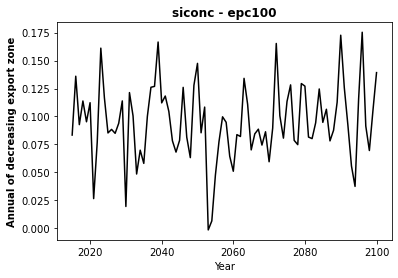

In [100]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_annual_dec_correlation.png".format(model, variable, model))

plt.show()

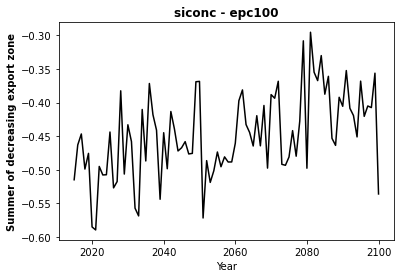

In [101]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_summer, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_summer_dec_correlation.png".format(model, variable, model))

plt.show()

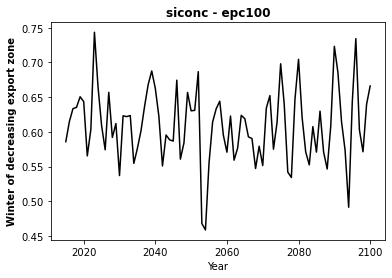

In [102]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_winter, 'k')
plt.title("{} - epc100".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_epc100_{}_winter_dec_correlation.png".format(model, variable, model))

plt.show()

## Correlation with intpp

### 20 year change correlation

#### Percentage

In [50]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
other_inc_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage.nc".format(model, experiment))

In [51]:
cor_per = xarray.corr(current_inc_per, other_inc_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.09664583)

In [52]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nPercentage correlation with intpp: {}".format(cor_per.values))
summary.close()

#### Absolute

In [53]:
current_inc_abs = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
other_inc_abs = xarray.open_dataarray("Data/intpp_{}_{}_absolute.nc".format(model, experiment))

In [54]:
cor_abs = xarray.corr(current_inc_abs, other_inc_abs, dim = ["lat", "lon"])
cor_abs

<xarray.DataArray ()>
array(-0.51188753)

In [55]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nAbsolute correlation with intpp: {}".format(cor_abs.values))
summary.close()

### Spatial correlation 

#### Increasing zone


In [103]:
current_inc = xarray.open_dataarray("Data/{}_{}_{}_inc.nc".format(variable, model, experiment),decode_coords="all")
current_inc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'siconc' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 ...
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Sea-Ice Area Percentage (Ocean Grid)
    units:          %
    comment:        Percentage of grid cell covered by sea ice
    original_name:  aice
    cell_methods:   area: mean where sea time: mean
    history:        2021-01-19T23:30:29Z altered by CMOR: Treated scalar dime...

In [104]:
epc = xarray.open_dataarray("Data/intpp_{}_{}_inc.nc".format(model, experiment), decode_coords="all")
epc

<xarray.DataArray 'intpp' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 ...
Attributes:
    standard_name:  net_primary_mole_productivity_of_biomass_expressed_as_car...
    long_name:      Primary Organic Carbon Production by All Types of Phytopl...
    units:          mol m-2 s-1
    comment:        Vertically integrated total primary (organic carbon) prod...
    original_name:  pp
    cell_methods:   area: mean where sea depth: sum where sea time: mean
    history:        2021-01-20T13:15:10Z altered by CMOR: Converted type from...

In [105]:
cor_inc = xarray.corr(current_inc, epc, dim = ["lat", "lon"])
cor_inc = cor_inc.groupby("time.year").mean("time")
cor_inc

<xarray.DataArray (year: 86)>
array([-0.56023335, -0.54815206, -0.51033548, -0.49246197, -0.47347005,
       -0.52507393, -0.52899445, -0.54150268, -0.50485202, -0.53826918,
       -0.52904519, -0.52515709, -0.46891571, -0.47442834, -0.48313282,
       -0.46130484, -0.4505407 , -0.46702345, -0.46795742, -0.53783055,
       -0.48656155, -0.46238165, -0.43370174, -0.47195139, -0.49731594,
       -0.42526742, -0.44934348, -0.5071086 , -0.48698474, -0.48486015,
       -0.48806984, -0.45722663, -0.48275432, -0.47892696, -0.47148071,
       -0.42785637, -0.45592202, -0.44060108, -0.47739866, -0.46518529,
       -0.44622514, -0.43813313, -0.43912907, -0.48312115, -0.40482713,
       -0.43232898, -0.4668243 , -0.42724605, -0.50470256, -0.45640609,
       -0.39938902, -0.44863871, -0.40532251, -0.4362332 , -0.46288479,
       -0.42714837, -0.44230289, -0.42121038, -0.38620757, -0.42187533,
       -0.38522071, -0.42258981, -0.38570393, -0.4301396 , -0.38243737,
       -0.38213824, -0.37425126, -0.35716912, -0.38544171, -0.37210838,
       -0.3456217 , -0.33263928, -0.30897038, -0.36697962, -0.3705597 ,
       -0.37628317, -0.35645892, -0.35191363, -0.31084813, -0.30138097,
       -0.32351403, -0.3322896 , -0.36540612, -0.34530627, -0.33671294,
       -0.31865697])
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [106]:
time = cor_inc["year"].values

In [107]:
current_inc_season = current_inc.resample(time='QS-DEC').mean(dim="time")
current_inc_season['time']

<xarray.DataArray 'time' (time: 345)>
array([cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 6, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2100, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time         (time) object 2014-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0

In [108]:
current_inc_summer = current_inc_season.sel(time=(current_inc_season.time.dt.month == 12))
current_inc_summer = current_inc_summer.sel(time = slice("2015","2100"))

In [109]:
current_inc_winter = current_inc_season.sel(time=(current_inc_season.time.dt.month == 6))

In [110]:
epc_inc_season = epc.resample(time='QS-DEC').mean(dim="time")

In [111]:
epc_inc_summer = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 12))
epc_inc_summer = epc_inc_summer.sel(time = slice("2015","2100"))
epc_inc_winter = epc_inc_season.sel(time=(epc_inc_season.time.dt.month == 6))

In [112]:
cor_inc_summer = xarray.corr(current_inc_summer, epc_inc_summer, dim = ["lat", "lon"])
cor_inc_summer

<xarray.DataArray (time: 86)>
array([-1.05163746e-01, -7.27753243e-02,  1.31160738e-01, -8.78128678e-02,
       -7.95926662e-02, -3.86928983e-02, -2.70966707e-02,  8.42559582e-05,
       -5.81911475e-02, -8.19513472e-02, -7.94563231e-02,  8.98754082e-02,
        6.19603695e-02, -2.01553926e-02, -7.62486241e-02,  9.37946384e-02,
        1.65434150e-01,  1.26744494e-01, -6.90457054e-02,  3.20193227e-02,
       -9.67989067e-02,  1.85586679e-01,  4.41757740e-02,  5.07741177e-02,
        8.63331185e-02,  1.51127056e-01, -4.89014547e-02, -6.87555483e-02,
        3.55395445e-02, -4.51136992e-02,  6.29339547e-02,  5.70684616e-02,
        3.25580694e-02,  1.87445084e-02,  2.40828314e-02,  8.48318584e-02,
        2.10756765e-01,  1.12316535e-01,  9.19174652e-02,  3.04265164e-02,
        1.30757498e-01,  1.11008679e-01,  1.80503672e-02,  1.45757559e-01,
        1.24851420e-01,  2.87071177e-02,  1.43990154e-01, -3.19710875e-02,
        1.91030578e-02,  1.36309862e-01,  1.31452202e-01,  1.73628902e-01,
        1.02625126e-01,  2.13544870e-03,  3.27906474e-03, -1.23293911e-02,
        1.95850823e-01,  2.81321877e-01,  1.39370611e-01,  2.35859055e-01,
        1.01070375e-01,  1.53284785e-01,  1.40661821e-01,  5.75216199e-02,
        4.10355677e-02,  2.72738705e-01,  3.08957316e-01,  1.95657276e-01,
        1.67361510e-01,  2.27265233e-01,  2.35945055e-01,  3.42608247e-01,
        1.85064793e-01,  1.67911207e-01,  2.08758842e-01,  2.10234133e-01,
        2.39798334e-01,  1.91947644e-01,  2.92618585e-01,  2.62532799e-01,
        2.83595580e-01,  1.06315201e-01,  2.16644634e-01,  2.28054209e-01,
        2.98100399e-01,  2.22057150e-01])
Coordinates:
  * time         (time) object 2015-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0

In [113]:
cor_inc_winter = xarray.corr(current_inc_winter, epc_inc_winter, dim = ["lat", "lon"])
cor_inc_winter

<xarray.DataArray (time: 86)>
array([-0.79025675, -0.77876361, -0.76997861, -0.75795536, -0.6660458 ,
       -0.75654001, -0.79804228, -0.80913205, -0.8172491 , -0.77116374,
       -0.73647564, -0.78599345, -0.76441742, -0.70161368, -0.75692317,
       -0.73666812, -0.71398702, -0.73194303, -0.76750452, -0.78197568,
       -0.76416022, -0.75756111, -0.66944797, -0.75345969, -0.77741688,
       -0.71818231, -0.7002474 , -0.77453236, -0.77422429, -0.77123303,
       -0.68860574, -0.72940356, -0.76261246, -0.7621414 , -0.71820363,
       -0.69591724, -0.69143848, -0.72216984, -0.74483219, -0.75709077,
       -0.73981636, -0.72135411, -0.68658497, -0.71914257, -0.7506106 ,
       -0.7295627 , -0.74474006, -0.67388002, -0.75734354, -0.71078452,
       -0.70318284, -0.65522196, -0.74419911, -0.74031162, -0.73553918,
       -0.65479376, -0.65681949, -0.70784412, -0.69339431, -0.65413951,
       -0.62498496, -0.65846003, -0.62598719, -0.70307638, -0.62613161,
       -0.60027091, -0.63967134, -0.63968914, -0.62680312, -0.62913766,
       -0.65021692, -0.57620853, -0.56964379, -0.65511191, -0.6352693 ,
       -0.63665373, -0.63273708, -0.64982234, -0.58989817, -0.60254808,
       -0.5716699 , -0.56811982, -0.61713007, -0.63252068, -0.62216643,
       -0.57420556])
Coordinates:
  * time         (time) object 2015-06-01 00:00:00 ... 2100-06-01 00:00:00
    spatial_ref  int64 0

In [67]:
data = {'Year': time,
        'Annual': cor_inc,
        'Summer': cor_inc_summer,
        'Winter': cor_inc_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.560233,-0.105164,-0.790257,CMCC-ESM2
1,2016,-0.548152,-0.072775,-0.778764,CMCC-ESM2
2,2017,-0.510335,0.131161,-0.769979,CMCC-ESM2
3,2018,-0.492462,-0.087813,-0.757955,CMCC-ESM2
4,2019,-0.473470,-0.079593,-0.666046,CMCC-ESM2
...,...,...,...,...,...
81,2096,-0.332290,0.106315,-0.568120,CMCC-ESM2
82,2097,-0.365406,0.216645,-0.617130,CMCC-ESM2
83,2098,-0.345306,0.228054,-0.632521,CMCC-ESM2
84,2099,-0.336713,0.298100,-0.622166,CMCC-ESM2


In [68]:
df.to_csv("csv/{}_{}_intpp_correlation_inc.csv".format(model, variable), index = False, header=True)

In [69]:
inc_mean = np.nanmean(cor_inc.values)
inc_mean_summer = np.nanmean(cor_inc_summer.values)
inc_mean_winter = np.nanmean(cor_inc_winter.values)

inc_max = np.nanmax(cor_inc.values)
inc_max_summer = np.nanmax(cor_inc_summer.values)
inc_max_winter = np.nanmax(cor_inc_winter.values)

inc_min = np.nanmin(cor_inc.values)
inc_min_summer = np.nanmin(cor_inc_summer.values)
inc_min_winter = np.nanmin(cor_inc_winter.values)

In [70]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with intpp in increasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(inc_mean, inc_max, inc_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(inc_mean_summer, inc_max_summer, inc_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(inc_mean_winter, inc_max_winter, inc_min_winter))
summary.close()

#### Plotting

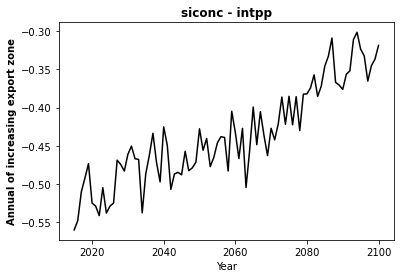

In [114]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_annual_inc_correlation.png".format(model, variable, model))

plt.show()

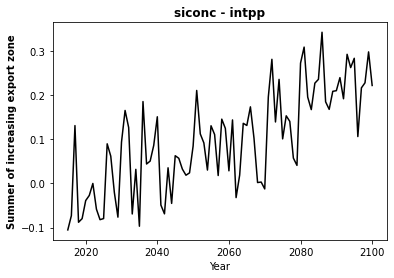

In [115]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_summer, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_summer_inc_correlation.png".format(model, variable, model))

plt.show()

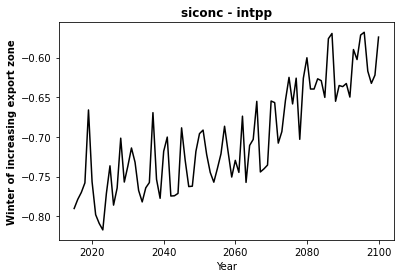

In [116]:
fig, ax = plt.subplots()

ax.plot(time, cor_inc_winter, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of increasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_winter_inc_correlation.png".format(model, variable, model))

plt.show()

#### Decreasing zone


In [117]:
current_dec = xarray.open_dataarray("Data/{}_{}_{}_dec.nc".format(variable, model, experiment),decode_coords="all")
current_dec

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in bounds not in variables: ['time_bnds']
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/backends/api.py:652: UserWarning: Variable(s) referenced in cell_measures not in variables: ['areacello']


<xarray.DataArray 'siconc' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 ...
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      Sea-Ice Area Percentage (Ocean Grid)
    units:          %
    comment:        Percentage of grid cell covered by sea ice
    original_name:  aice
    cell_methods:   area: mean where sea time: mean
    history:        2021-01-19T23:30:29Z altered by CMOR: Treated scalar dime...

In [118]:
epc_dec = xarray.open_dataarray("Data/intpp_{}_{}_dec.nc".format(model, experiment), decode_coords="all")
epc_dec

<xarray.DataArray 'intpp' (time: 1032, lat: 180, lon: 360)>
[66873600 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    spatial_ref  int64 ...
Attributes:
    standard_name:  net_primary_mole_productivity_of_biomass_expressed_as_car...
    long_name:      Primary Organic Carbon Production by All Types of Phytopl...
    units:          mol m-2 s-1
    comment:        Vertically integrated total primary (organic carbon) prod...
    original_name:  pp
    cell_methods:   area: mean where sea depth: sum where sea time: mean
    history:        2021-01-20T13:15:10Z altered by CMOR: Converted type from...

In [119]:
cor_dec = xarray.corr(current_dec, epc_dec, dim = ["lat", "lon"])
cor_dec = cor_dec.groupby("time.year").mean("time")
cor_dec

<xarray.DataArray (year: 86)>
array([-0.40229768, -0.38400075, -0.35159669, -0.36779111, -0.37537037,
       -0.39628073, -0.39278345, -0.40706451, -0.35175944, -0.35926435,
       -0.39887321, -0.38824157, -0.37441581, -0.37128785, -0.37931133,
       -0.37928107, -0.37584401, -0.36844503, -0.36759462, -0.38147733,
       -0.38885206, -0.37269555, -0.35570707, -0.35904314, -0.37645766,
       -0.38200986, -0.35088236, -0.35184013, -0.37779591, -0.36300189,
       -0.36745573, -0.36484169, -0.3821088 , -0.40058264, -0.359406  ,
       -0.35357458, -0.33787611, -0.36069113, -0.36821835, -0.37032185,
       -0.32441541, -0.3443319 , -0.33398135, -0.33167856, -0.33888935,
       -0.35617376, -0.3556913 , -0.35973831, -0.36496406, -0.35038317,
       -0.30234925, -0.37044745, -0.33826747, -0.35487367, -0.37260585,
       -0.33355604, -0.33617491, -0.32160237, -0.34747778, -0.31727764,
       -0.30465645, -0.35804356, -0.31573824, -0.34118666, -0.32035363,
       -0.32455658, -0.31390774, -0.32706665, -0.31633662, -0.32129838,
       -0.29322231, -0.30296724, -0.32208749, -0.29962329, -0.31535802,
       -0.29870514, -0.32245754, -0.31043296, -0.30968006, -0.2804341 ,
       -0.28803394, -0.28928064, -0.31068036, -0.30451593, -0.27620213,
       -0.29856616])
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [120]:
time = cor_dec["year"].values

In [121]:
current_dec_season = current_dec.resample(time='QS-DEC').mean(dim="time")
current_dec_season['time']

<xarray.DataArray 'time' (time: 345)>
array([cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 6, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2100, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time         (time) object 2014-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0

In [122]:
current_dec_summer = current_dec_season.sel(time=(current_dec_season.time.dt.month == 12))
current_dec_summer = current_dec_summer.sel(time = slice("2015","2100"))

In [123]:
current_dec_winter = current_dec_season.sel(time=(current_dec_season.time.dt.month == 6))

In [124]:
epc_dec_season = epc_dec.resample(time='QS-DEC').mean(dim="time")

In [125]:
epc_dec_summer = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 12))
epc_dec_summer = epc_dec_summer.sel(time = slice("2015","2100"))
epc_dec_winter = epc_dec_season.sel(time=(epc_dec_season.time.dt.month == 6))

In [126]:
cor_dec_summer = xarray.corr(current_dec_summer, epc_dec_summer, dim = ["lat", "lon"])
cor_dec_summer

<xarray.DataArray (time: 86)>
array([0.35435228, 0.32894614, 0.35102697, 0.20071244, 0.19692639,
       0.17251492, 0.17034847, 0.33583257, 0.33649265, 0.2841146 ,
       0.18140025, 0.28640829, 0.33883817, 0.21390612, 0.1015564 ,
       0.3256639 , 0.25699012, 0.3610682 , 0.33434794, 0.2381096 ,
       0.20429975, 0.26256388, 0.22847273, 0.41449993, 0.19149373,
       0.28207952, 0.22093088, 0.11434086, 0.18341708, 0.17119872,
       0.32397089, 0.15236854, 0.01919627, 0.25263051, 0.29168137,
       0.29502566, 0.32946785, 0.26512756, 0.19088366, 0.24748781,
       0.2405012 , 0.27514587, 0.27645586, 0.18185561, 0.14475078,
       0.23582821, 0.27981124, 0.22449322, 0.18705303, 0.25099237,
       0.2461923 , 0.20344433, 0.30383213, 0.12920794, 0.22713097,
       0.24546266, 0.30902252, 0.3927333 , 0.2561489 , 0.36726452,
       0.20264447, 0.2738782 , 0.24620344, 0.27075486, 0.25865254,
       0.26283495, 0.25577438, 0.24331881, 0.29535086, 0.28210137,
       0.29042185, 0.37720063, 0.22186149, 0.16684425, 0.3291171 ,
       0.27771581, 0.34611615, 0.22859204, 0.29561535, 0.33004025,
       0.3536579 , 0.16240557, 0.26861574, 0.29201059, 0.33379463,
       0.30016286])
Coordinates:
  * time         (time) object 2015-12-01 00:00:00 ... 2100-12-01 00:00:00
    spatial_ref  int64 0

In [127]:
cor_dec_winter = xarray.corr(current_dec_winter, epc_dec_winter, dim = ["lat", "lon"])
cor_dec_winter

<xarray.DataArray (time: 86)>
array([-0.67189197, -0.65887904, -0.65290353, -0.62968856, -0.63195328,
       -0.66700744, -0.69743458, -0.67896567, -0.68097255, -0.65378268,
       -0.64818019, -0.68168589, -0.65828787, -0.6191574 , -0.6459465 ,
       -0.6642599 , -0.64228614, -0.6185023 , -0.65052987, -0.64337278,
       -0.6563174 , -0.66651093, -0.60105916, -0.61545043, -0.61378198,
       -0.6676284 , -0.6242496 , -0.65270418, -0.66112877, -0.63609164,
       -0.59348687, -0.62407136, -0.65463421, -0.6601655 , -0.64247586,
       -0.61245078, -0.60472359, -0.65007897, -0.64643917, -0.65198986,
       -0.59404699, -0.59956182, -0.60852502, -0.62328864, -0.63623302,
       -0.64346502, -0.61129562, -0.63436763, -0.61398592, -0.63675918,
       -0.62659659, -0.63079109, -0.65054849, -0.64292854, -0.6544678 ,
       -0.62129811, -0.59205623, -0.61771451, -0.62900768, -0.58985626,
       -0.62577376, -0.62675311, -0.60157927, -0.62987536, -0.61030101,
       -0.59009573, -0.62577504, -0.61137063, -0.60839779, -0.61296218,
       -0.63028312, -0.59713544, -0.59440979, -0.59900242, -0.5766508 ,
       -0.62222594, -0.59641002, -0.61075567, -0.59724469, -0.58142305,
       -0.60186939, -0.54679537, -0.61355329, -0.59514271, -0.57006287,
       -0.60867376])
Coordinates:
  * time         (time) object 2015-06-01 00:00:00 ... 2100-06-01 00:00:00
    spatial_ref  int64 0

In [128]:
data = {'Year': time,
        'Annual': cor_dec,
        'Summer': cor_dec_summer,
        'Winter': cor_dec_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,-0.402298,0.354352,-0.671892,CMCC-ESM2
1,2016,-0.384001,0.328946,-0.658879,CMCC-ESM2
2,2017,-0.351597,0.351027,-0.652904,CMCC-ESM2
3,2018,-0.367791,0.200712,-0.629689,CMCC-ESM2
4,2019,-0.375370,0.196926,-0.631953,CMCC-ESM2
...,...,...,...,...,...
81,2096,-0.289281,0.162406,-0.546795,CMCC-ESM2
82,2097,-0.310680,0.268616,-0.613553,CMCC-ESM2
83,2098,-0.304516,0.292011,-0.595143,CMCC-ESM2
84,2099,-0.276202,0.333795,-0.570063,CMCC-ESM2


In [129]:
df.to_csv("csv/{}_{}_intpp_correlation_dec.csv".format(model, variable), index = False, header=True)

In [130]:
dec_mean = np.nanmean(cor_dec.values)
dec_mean_summer = np.nanmean(cor_dec_summer.values)
dec_mean_winter = np.nanmean(cor_dec_winter.values)

dec_max = np.nanmax(cor_dec.values)
dec_max_summer = np.nanmax(cor_dec_summer.values)
dec_max_winter = np.nanmax(cor_dec_winter.values)

dec_min = np.nanmin(cor_dec.values)
dec_min_summer = np.nanmin(cor_dec_summer.values)
dec_min_winter = np.nanmin(cor_dec_winter.values)

In [131]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nSpatial correlation with intpp in decreasing zone:\n")
summary.write("Annual mean: {}\nAnnual max: {}\nAnnual min: {}".format(dec_mean, dec_max, dec_min))
summary.write("\n\nSummer mean: {}\nSummer max: {}\nSummer min: {}".format(dec_mean_summer, dec_max_summer, dec_min_summer))
summary.write("\n\nWinter mean: {}\nWinter max: {}\nWinter min: {}".format(dec_mean_winter, dec_max_winter, dec_min_winter))
summary.close()

#### Plotting

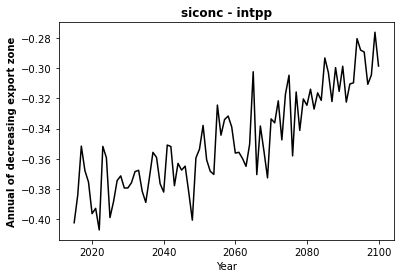

In [132]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_annual_dec_correlation.png".format(model, variable, model))

plt.show()

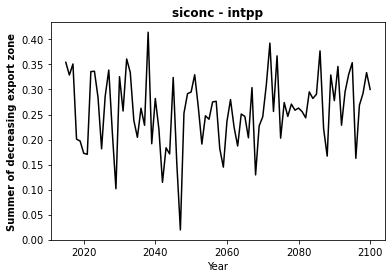

In [133]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_summer, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_summer_dec_correlation.png".format(model, variable, model))

plt.show()

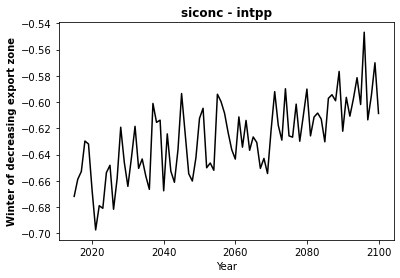

In [134]:
fig, ax = plt.subplots()

ax.plot(time, cor_dec_winter, 'k')
plt.title("{} - intpp".format(variable), fontweight = "bold")

ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter of decreasing export zone")
plt.xlabel("Year")

plt.savefig("output/{}/{}_intpp_{}_winter_dec_correlation.png".format(model, variable, model))

plt.show()